# Abstract


Este proyecto tiene como objetivo analizar y predecir el sentimiento asociado a los comentarios de usuarios en videos de YouTube, utilizando técnicas de procesamiento de lenguaje natural (NLP) y aprendizaje automático. Para ello, se emplea un conjunto de datos compuesto por dos datasets que integran información sobre métricas de rendimiento de videos (como vistas, likes, dislikes y fechas) y los comentarios realizados por los usuarios en distintos canales.

El análisis incluye la limpieza y preprocesamiento del texto, la transformación de los comentarios mediante métodos como la vectorización (TF-IDF o bag of words), así como la clasificación de sentimientos en categorías como positivo, negativo o neutro. Además, se evalúa el desempeño de los modelos a través de métricas como la matriz de confusión.

Este estudio permite identificar patrones de comportamiento y percepción de la audiencia, proporcionando herramientas útiles para la toma de decisiones en estrategias de contenido digital y análisis de reputación en plataformas sociales.


# Introduccion


En la era digital, las plataformas de redes sociales como YouTube se han convertido en espacios fundamentales para la generación y consumo de contenido. Millones de usuarios interactúan diariamente mediante visualizaciones, reacciones y comentarios, generando una gran cantidad de datos que reflejan opiniones, emociones y percepciones sobre los contenidos publicados. Este cúmulo de información representa una fuente valiosa para el análisis de tendencias, la evaluación del impacto de contenidos y la comprensión del comportamiento de la audiencia.

El presente proyecto tiene como objetivo principal analizar y predecir el sentimiento de los comentarios realizados por usuarios en videos de YouTube, mediante la aplicación de técnicas de procesamiento de lenguaje natural (NLP) y modelos de aprendizaje automático. Para ello, se utilizaron dos conjuntos de datos (datasets) que contienen información detallada sobre métricas de rendimiento de los videos (visualizaciones, likes, dislikes, fecha de publicación, etc.) y los comentarios asociados a dichos contenidos.

A través de un proceso de preprocesamiento textual, vectorización y entrenamiento de modelos de clasificación, se busca categorizar los comentarios en sentimientos positivos, negativos o neutros. Adicionalmente, se evalúa el desempeño de los modelos utilizando métricas estándar como la matriz de confusión, precisión, recall y F1-score. Este análisis permite generar una visión integral del impacto emocional que genera un video en su audiencia y puede ser útil para optimizar estrategias de contenido, monitoreo de marca y análisis de reputación en línea.


# Objetivos


- Recolectar y unificar datos de dos datasets que contienen información sobre métricas de videos y comentarios de usuarios en distintos canales de YouTube.

- Preprocesar el texto de los comentarios aplicando técnicas como limpieza, tokenización, lematización y eliminación de stopwords.

- Transformar los comentarios en representaciones numéricas utilizando métodos como bolsa de palabras (bag of words) y TF-IDF.

- Entrenar y evaluar modelos de clasificación para predecir el sentimiento de los comentarios, categorizándolos como positivos, negativos o neutros.

- Medir el desempeño de los modelos aplicando métricas como accuracy, F1-score y matriz de confusión.

- Interpretar los resultados para obtener conclusiones sobre la percepción de los usuarios y su relación con las métricas de los videos.


# Descripcion del dataset


Tenemos dos datasets cada uno con diferentes metricas de los videos.Estos son los datos de cada uno:

- video_id .
- comment_tex: comentario de usuario.
- likes: Número de "me gusta" que recibió el comentario.
- published_at: Fecha y hora en que se publicó el comentario.

Dataset USvideos

- video_id: ID único del video.
- title: Título del video.
- channel title: Número de visualizaciones.
- likes: Número de "me gusta".
- dislikes: Número de "no me gusta".
- comment_total: Total de comentarios.
- views: total devistas.

Se creo un dataset adicional para el entrenamiento del modelo de prediccion que es convinacion de los dos datasets.


In [4]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [12]:
df = pd.read_csv(
    "data/UScomments.csv",
    encoding="utf-8",         
    engine="python",         
    on_bad_lines="skip"       
)
df_videos = pd.read_csv(
    "data/USvideos.csv",
    encoding="utf-8",         
    engine="python",         
    on_bad_lines="skip"       
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691375 entries, 0 to 691374
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691375 non-null  object
 1   comment_text  691349 non-null  object
 2   likes         691375 non-null  object
 3   replies       691375 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [14]:
display(df_videos)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09
...,...,...,...,...,...,...,...,...,...,...,...
7987,xlu6i6lT_vk,How Do MASSIVE Sinkholes Form?,Life Noggin,27,sinkhole|how do sinkholes form|sinkhole in wat...,440393,14362,390,1575,https://i.ytimg.com/vi/xlu6i6lT_vk/default.jpg,22.10
7988,qRoVlH1OcI4,Trump slams Clinton for defending NFL anthem p...,Business Insider,25,Business Insider|Donald Trump|Hillary Clinton|...,55762,1265,760,1873,https://i.ytimg.com/vi/qRoVlH1OcI4/default.jpg,22.10
7989,EoejGgUNmVU,LP - Lost On You (A Night at The McKittrick Ho...,LP,10,LP|Death Valley|Other People|Lost On You|The M...,142908,7088,68,437,https://i.ytimg.com/vi/EoejGgUNmVU/default.jpg,22.10
7990,MT1CMTI0EVw,Tré Melvin @ #YouTubeBlack FanFest Washington ...,YouTube FanFest,24,YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...,24532,2148,77,0,https://i.ytimg.com/vi/MT1CMTI0EVw/default.jpg,22.10


In [9]:
display(df_videos)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691370,EoejGgUNmVU,Лучшая,1,0
691371,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691372,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691373,EoejGgUNmVU,Islığı yeter...,0,0


In [ ]:
df_videos = pd.read_csv(
    "data/USvideos.csv",
    encoding="utf-8",         
    engine="python",          
    on_bad_lines="skip"
)

display(df_videos)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09
...,...,...,...,...,...,...,...,...,...,...,...
7987,xlu6i6lT_vk,How Do MASSIVE Sinkholes Form?,Life Noggin,27,sinkhole|how do sinkholes form|sinkhole in wat...,440393,14362,390,1575,https://i.ytimg.com/vi/xlu6i6lT_vk/default.jpg,22.10
7988,qRoVlH1OcI4,Trump slams Clinton for defending NFL anthem p...,Business Insider,25,Business Insider|Donald Trump|Hillary Clinton|...,55762,1265,760,1873,https://i.ytimg.com/vi/qRoVlH1OcI4/default.jpg,22.10
7989,EoejGgUNmVU,LP - Lost On You (A Night at The McKittrick Ho...,LP,10,LP|Death Valley|Other People|Lost On You|The M...,142908,7088,68,437,https://i.ytimg.com/vi/EoejGgUNmVU/default.jpg,22.10
7990,MT1CMTI0EVw,Tré Melvin @ #YouTubeBlack FanFest Washington ...,YouTube FanFest,24,YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...,24532,2148,77,0,https://i.ytimg.com/vi/MT1CMTI0EVw/default.jpg,22.10


Distribucion por comentarios


Limpieza de datos


In [ ]:
df.isnull().sum().sum()
df_videos.isnull().sum().sum()

0

Text(0, 0.5, 'Frecuencia')

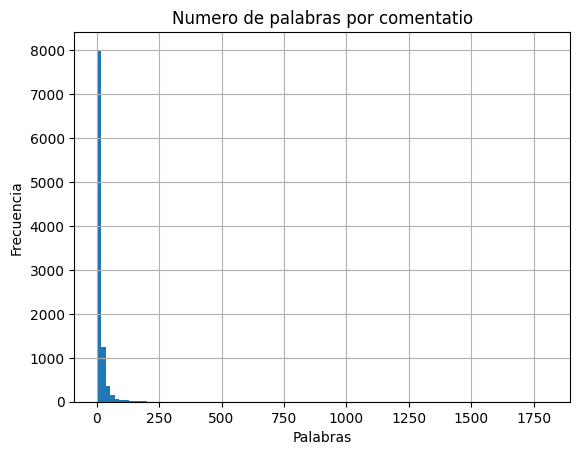

In [34]:
#Eliminamos valores nulos y convertimos todo a string. En este caso se esta contando a los emogis como una palabra.
df = df.dropna(subset=['comment_text'])  
df['comment_text'] = df['comment_text'].astype(str)

#Recortamos la muesra a 10k para una mejor visualizacion de la grafica
comments = df[:10000]
words_per_comment = comments.comment_text.apply(lambda x: len(x.split(" ")))
words_per_comment.hist(bins = 100)
plt.title('Numero de palabras por comentatio')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')

In [35]:
words_per_comment.mean()

15.6325

57585477


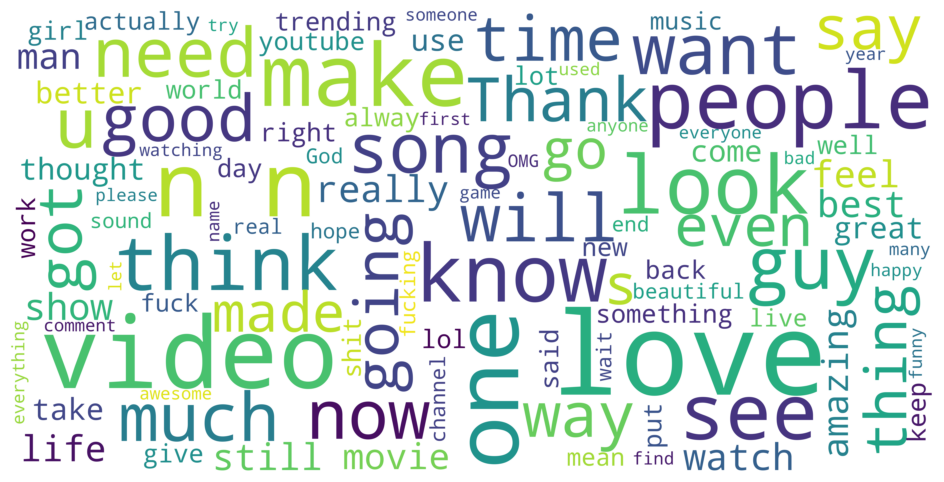

In [36]:
word_cloud_text = ''.join(df.comment_text)
print(len(word_cloud_text))

wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=400
).generate(word_cloud_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

El wordcloud muestra que hay muchos comentarios que hablan sobre temas de amor, gente, agradecimiento (thank), musica, peliculas, tambien se observan otras palabras como bueno, dios, tabajo, vida. Se puede observar que no hay mucha negatividad en los comentarios.


# Estandarizacion de raitings para analisis de sentmiento


Para propositos de analisis d esentimiento convertiremos todos los ratings en valores binarios con las siguientes reglas:

- si los likes son mayores que los dislikes y la diferencia es mayor de 100 likes se toma como un viedo positivo (1)
- si los dislikes son mayoes que los likes y la diferencia es mayor que 10 likes se toma como un video negativo (0)
- si no cumple ninguna de las dos condiciones el valor es neutro (3)


In [37]:
condicion_positiva = (df_videos["likes"] - df_videos["dislikes"] > 100) & (df_videos["likes"] > df_videos["dislikes"])

# Condición 2: Si (dislikes - likes) > 50 → 0
condicion_negativa = (df_videos["dislikes"] - df_videos["likes"] > 10)

# Inicializar la columna con un valor neutral (por ejemplo, NaN)
df_videos["sentiment_rating"] = np.nan

# Aplicar las condiciones
df_videos.loc[condicion_positiva, "sentiment_rating"] = 1
df_videos.loc[condicion_negativa, "sentiment_rating"] = 0

# Opcional: Para los casos que no cumplen ninguna condición, podrías asignar otro valor (por ejemplo, 0.5)
df_videos["sentiment_rating"].fillna(3, inplace=True)

# Ver conteo de valores
df_videos["sentiment_rating"].value_counts(dropna=False)

sentiment_rating
1.0    7277
3.0     507
0.0     208
Name: count, dtype: int64

In [38]:
display(df_videos)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,sentiment_rating
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,1.0
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09,1.0
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09,1.0
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09,1.0
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7987,xlu6i6lT_vk,How Do MASSIVE Sinkholes Form?,Life Noggin,27,sinkhole|how do sinkholes form|sinkhole in wat...,440393,14362,390,1575,https://i.ytimg.com/vi/xlu6i6lT_vk/default.jpg,22.10,1.0
7988,qRoVlH1OcI4,Trump slams Clinton for defending NFL anthem p...,Business Insider,25,Business Insider|Donald Trump|Hillary Clinton|...,55762,1265,760,1873,https://i.ytimg.com/vi/qRoVlH1OcI4/default.jpg,22.10,1.0
7989,EoejGgUNmVU,LP - Lost On You (A Night at The McKittrick Ho...,LP,10,LP|Death Valley|Other People|Lost On You|The M...,142908,7088,68,437,https://i.ytimg.com/vi/EoejGgUNmVU/default.jpg,22.10,1.0
7990,MT1CMTI0EVw,Tré Melvin @ #YouTubeBlack FanFest Washington ...,YouTube FanFest,24,YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...,24532,2148,77,0,https://i.ytimg.com/vi/MT1CMTI0EVw/default.jpg,22.10,1.0


In [39]:
# removiendo neutrales
df_videos = df_videos[df_videos["sentiment_rating"] != 3]

Text(0, 0.5, 'frecuenca')

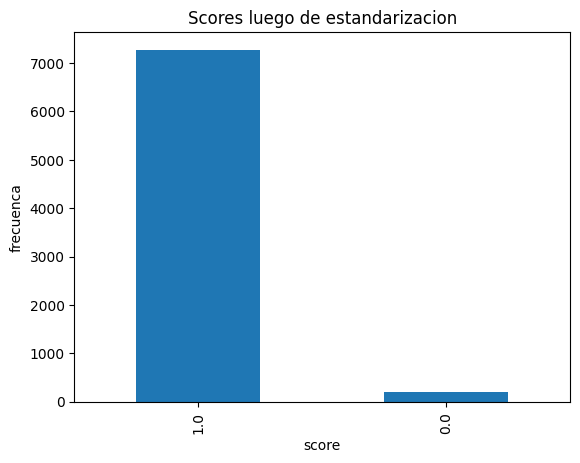

In [40]:
df_videos["sentiment_rating"].value_counts().plot.bar()
plt.title("Scores luego de estandarizacion")
plt.xlabel("score")
plt.ylabel("frecuenca")

# Preprocesamiento


Se realizaran las siguientes conversiones:

1. Convertir palabras a minusculas
2. remover caracteres especiales
3. remover stopwords y palabras de alta frecuencia
4. Stemming y lemantizacion


In [41]:
df['comment_text_new'] = df['comment_text'].apply(lambda x: x.lower())


In [42]:
from nltk import word_tokenize
import nltk
import re
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alvar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\alvar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alvar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Removemos los caracteres especiales


In [ ]:
review_backup = df["comment_text"].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

#Regex de prueba para remover saltos de linea
#review_backup = df["comment_text"].apply(lambda x: re.sub('[^A-Za-z0-9 ]+|\n', ' ', x))

Miramos los resultados


In [44]:
print("Comentario anterior")
review_backup.values[8]

Comentario anterior


'Happy one year vlogaversary'

In [45]:
print("Comentario nuevo")
df["comment_text_new"][8]

Comentario nuevo


'happy one year vlogaversary'

# Stopwords y palabras de alta/baja frecuencia


In [46]:
noise_words = []
stopwords_corpus = nltk.corpus.stopwords
eng_stop_words = stopwords_corpus.words('english')
noise_words.extend(eng_stop_words)
print(len(noise_words))
noise_words

198


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

# Stemming y lemantizacion


In [19]:
from nltk.stem import PorterStemmer, WordNetLemmatizer, LancasterStemmer

nltk.download('wordnet')

from nltk.corpus import wordnet
from nltk.corpus import stopwords
porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alvar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\alvar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Creacion de modelo de ML


In [67]:

display(df_videos.head(5))

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,sentiment_rating
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,1.0
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09,1.0
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09,1.0
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09,1.0
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09,1.0


In [49]:
df_videos.to_csv("data/USvideosInfo.csv", index=False)

Se junta el valor del sentiment rating en el dataset de comentarios para tener un valor de sentimiento del video por comentario


In [66]:
data = df.merge(
    df_videos[['video_id', 'sentiment_rating']],
    on= 'video_id',
    how='left'
)

print(data.shape)
display(data.head(5))

(2914741, 6)


,video_id,comment_text,likes,replies,comment_text_new,sentiment_rating
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,logan paul it's yo big day ‼️‼️‼️,1.0
1,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,logan paul it's yo big day ‼️‼️‼️,1.0
2,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,logan paul it's yo big day ‼️‼️‼️,1.0
3,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,logan paul it's yo big day ‼️‼️‼️,1.0
4,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,logan paul it's yo big day ‼️‼️‼️,1.0


Limpiamos los datos


In [51]:
data.isnull().sum().sum()

6161

In [52]:
data_clean = data.copy().dropna()
data_clean.isnull().sum().sum()

0

Tokenizamos y removemos stopwrds y sintertizamos


In [ ]:

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(doc):
    tokens = word_tokenize(doc)
    return ' '.join(
        stemmer.stem(w) for w in tokens if w not in stop_words
    )

data_clean['comment_text_new'] = data_clean['comment_text_new'].apply(preprocess)

In [ ]:

from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(
    data_clean, 
    test_size=0.2, 
    random_state=42, 
    stratify=data_clean['sentiment_rating']
)

X_train = data_train['comment_text']
y_train = data_train['sentiment_rating']

X_test = data_test['comment_text']
y_test = data_test['sentiment_rating']

Vectorizar, entrenar modelo y predecir


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
 
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_vect, y_train)

y_pred = model.predict(X_test_vect)
y_prob = model.predict_proba(X_test_vect)[:, 1]

c:\Users\alvar\anaconda3\envs\data\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metricas


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9824691086372044
F1 score: 0.9910889514532227
Confusion matrix:
 [[  4406   8837]
 [  1361 567112]]


In [63]:

predictions = pd.DataFrame()
predictions['Text'] = X_test.values
predictions['Sentiment_rating'] = y_test.values
predictions['Predicted_sentiment'] = y_pred
predictions['Predicted_probability'] = y_prob


display(predictions)

,Text,Sentiment_rating,Predicted_sentiment,Predicted_probability
0,"my my my, African American goddess rite there.",1.0,1.0,0.983472
1,Amo esse cara😍,1.0,1.0,0.999751
2,Is it me or does it look like a game trailer,1.0,1.0,0.996639
3,I didn't know Disney still made Mickey mouse c...,1.0,1.0,0.999754
4,Hollywood is made up of 90% creeps that object...,1.0,1.0,0.997382
...,...,...,...,...
581711,"Welcome back old Sin counter, on one of my fav...",1.0,1.0,0.998981
581712,pretty little screaming^^,1.0,1.0,0.986969
581713,I like the emoji movie,1.0,1.0,0.998457
581714,Is it only me that thinks Louis'es and Bebe's ...,1.0,1.0,0.999964


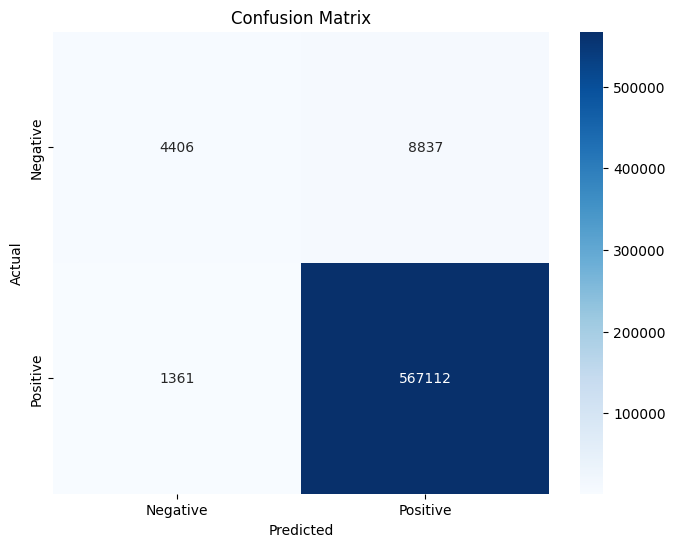

In [64]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(predictions['Sentiment_rating'], predictions['Predicted_sentiment'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Nuestro TP es alto y nuestro FP es bajo, ya que el dataset no nos da la cantidad de negativos sufisientes parael entrenamiento del modelo, podriamos ajustar, reducioendo la cantidad de positivos para un mejor entrenamiento.


In [65]:
predictions[
    predictions['Predicted_sentiment'] != predictions['Sentiment_rating']
].sort_values(by=["Predicted_probability"]).head(3)

,Text,Sentiment_rating,Predicted_sentiment,Predicted_probability
405198,Song lyrics \nJake Paulers \nJake Paulers \nJa...,1.0,0.0,1.427998e-13
195649,Can't see the initial interaction between the ...,1.0,0.0,7.770300e-08
222574,These players had nothing to protest for the l...,1.0,0.0,1.336752e-07


Aqui muestra algunos casos en los que el modelo es diferete del raiting, por lo que vemos en algunos comentarios, es probable que ajustemos el sentiment rating, para una mejor presicion.


# Conclusiones


Como se pudo observar el modelo predice positivos con una muy buena efectividad, solo se tiene que ajustar el sentiment raiting para que tenga una mejor efectividad a la hora de predecir falsos positivos, se puede pensar en una manera mas efectiva de calcular el sentiment_raiting para un mejor ajuste. Tambien puede mejorarse entrenando el modelo con mas casos negativos para que mejore su aprendizaje.
